In [1]:
import numpy as np
import scipy.linalg as sp
import time
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

In [2]:
def Landweber(A, b, iter_=30, alp_=None):
    """
    Implementacja metody iteracyjnej Landwebera
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    alp_  : relaxation parameter alp_>0 
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    # Set relaxation parameter if not given: alp=1/|max(eigA.T A)| 
    if alp_ == None:
        alp_ = 1 / np.abs(np.max(np.linalg.eig(A.T@A)[0]))  
    
    x = np.zeros( (iter_, A.shape[1], 1) )   
    invS = np.linalg.inv( (1/alp_)*np.eye(A.shape[1]) )
    T = (1/alp_)*np.eye(A.shape[1])-A.T@A
    
    for i in range(iter_):
        G = invS@T
        c = invS@b
        x[i] = G@x[i-1]+c
    return x

In [3]:
def GaussSeidel(A, b, iter_=30):
    """
    Implementacja metody iteracyjnej Gaussa-Sidela
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    x = np.zeros( (iter_, A.shape[1], 1) )
    invS = np.linalg.inv(np.tril(A, 0))
    T = -np.triu(A, 1)
    
    for i in range(iter_):
        G = invS@T
        c = invS@b
        x[i] = G@x[i-1]+c
    return x

In [4]:
def Jacobi(A, b, iter_=30):
    """
    Implementacja metody iteracyjnej Jacobiego
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    x = np.zeros( (iter_, A.shape[1], 1) )
    invS = np.reciprocal(np.diag(A))[np.newaxis]
    T = -A+np.diag(np.diag(A))    
    
    for i in range(iter_):
        G = invS*T
        c = invS.T*b
        x[i] = G@x[i-1]+c
    return x

In [5]:
def SuccessiveOverRelaxation(A, b, omeg_=1, iter_=30):
    """
    Implementacja metody iteracyjnej Successive Over-Relaxation (SOR)
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    omeg_ : relaxation parametr omeg_ in (0,2)
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """ 
    x = np.zeros( (iter_, A.shape[1], 1) )
    invS = np.linalg.inv( np.tril(A,-1) + (1/omeg_)*np.diag(np.diag(A)) )
    T = -(np.triu(A,1)+ ((omeg_-1)/omeg_)*np.diag(np.diag(A)))
    
    for i in range(iter_):
        G = invS@T
        c = invS@b
        x[i] = G@x[i-1]+c
    return x

In [6]:
def SteepestDescen(A, b, iter_=30):
    """
    Implementacja metody iteracyjnej SteepestDescen (SD)
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    x = np.zeros( (iter_, A.shape[1], 1) )
    
    for i in range(iter_):
        r = b-A@x[i-1]
        g = -A.T@r
        w = A@g
        alp_ = (g.T@g)/(w.T@w)
        x[i] = x[i-1]-alp_*g
    return x

In [7]:
def Kaczmarz(A, b, alp_=1, iter_ = 30):
    """
    Implementacja metody iteracyjnej Kaczmarza
    Parameters
    ----------
    A : numpy.array (matrix) - equation matrix
    b : numpy.array (vector) - unknown vector
    alp_ : relaxation parametr alp_ (0,2)
    iter_ : number of iteration
    
    Returns
    ----------
    x : numpy.array (vector) - solve for n-th itereations
    """
    
    x = np.zeros( (iter_, A.shape[1], 1) )
    l = np.power(np.linalg.norm(A, axis=1), 2)
    
    for j in range(iter_):
        x[j] = x[j-1]
        for i in range(A.shape[0]):
            x[j] += alp_*((b[i]-A[i,:]@x[j])/l[i])*A[[i],:].T
    return x

In [8]:
def designateParameters(X,A,b,x_solve):
    error = {}
    error['Solve'] = np.linalg.norm(X-x_solve, axis=1)
    error['Residual'] = np.linalg.norm(b-A@X, axis=1)
    temp = np.append(np.zeros(x_solve.shape), X)
    temp = temp[:temp.size-x_solve.size].reshape(X.shape[0], X.shape[1], X.shape[2])
    error['Convergence'] = np.linalg.norm(temp-X, axis=1)
    return error

In [9]:
def testMethods(A,b,x_solve,iter_=30):
    methods = {}
    methods['Landweber'] = {} 
    methods['GaussSeidel'] = {}
    methods['Jacobi'] = {}
    methods['SuccessiveOverRelaxation'] = {}
    methods['SteepestDescen'] = {}
    methods['Kaczmarz'] = {}
    
    #Function pointers
    methods['Landweber']['Fun'] = Landweber
    methods['GaussSeidel']['Fun'] = GaussSeidel
    methods['Jacobi']['Fun'] = Jacobi
    methods['SuccessiveOverRelaxation']['Fun'] = SuccessiveOverRelaxation
    methods['SteepestDescen']['Fun'] = SteepestDescen
    methods['Kaczmarz']['Fun'] = Kaczmarz
    
    for m in methods:
        start_ns = time.time_ns()
        methods[m]['Value'] = methods[m]['Fun'](A,b,iter_=iter_)
        methods[m]['Time']  = time.time_ns() -start_ns
        methods[m]['Error'] = designateParameters(methods[m]['Value'],A,b,x_solve)
    
    return methods

In [10]:
def drawPlots(methods, log=False):
    for m in methods:
        if log == False:
            plt.plot(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Residual'], label=m)
        else:
            plt.loglog(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Residual'], label=m)
    plt.title("Błąd Residualny")
    plt.grid()
    plt.legend()
    plt.show()
    
    for m in methods:
        if log == False:
            plt.plot(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Solve'], label=m)
        else:
            plt.loglog(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Solve'], label=m)
    plt.title("Błąd Rozwiązania")
    plt.grid()
    plt.legend()
    plt.show()
    
    for m in methods:
        if log == False:
            plt.plot(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Convergence'], label=m)
        else:
            plt.loglog(range(methods[m]['Value'].shape[0]),methods[m]['Error']['Convergence'], label=m)
    plt.title("Kowergencja")
    plt.grid()
    plt.legend()
    plt.show()

---
## Zadanie 1


Rozwiązanie dokładne:
[[1.]
 [2.]
 [3.]
 [4.]]

Wyniki uzyskane metodą Landweber, w 30 iteracjach:
[[0.62467947]
 [1.53026565]
 [2.51994322]
 [2.60797743]]
Czas wykonania 30 iteracji: 1490.268 ms

Wyniki uzyskane metodą GaussSeidel, w 30 iteracjach:
[[0.99998866]
 [1.99998516]
 [2.99998799]
 [3.999994  ]]
Czas wykonania 30 iteracji: 1366.738 ms

Wyniki uzyskane metodą Jacobi, w 30 iteracjach:
[[0.99719639]
 [1.99439279]
 [2.99546367]
 [3.99653455]]
Czas wykonania 30 iteracji: 755.974 ms

Wyniki uzyskane metodą SuccessiveOverRelaxation, w 30 iteracjach:
[[0.99998866]
 [1.99998516]
 [2.99998799]
 [3.999994  ]]
Czas wykonania 30 iteracji: 975.095 ms

Wyniki uzyskane metodą SteepestDescen, w 30 iteracjach:
[[0.06596297]
 [0.45731098]
 [1.48855101]
 [3.04647593]]
Czas wykonania 30 iteracji: 1757.39 ms

Wyniki uzyskane metodą Kaczmarz, w 30 iteracjach:
[[0.49608404]
 [1.28167961]
 [2.37763728]
 [3.68881864]]
Czas wykonania 30 iteracji: 2278.852 ms


 Parametry: alpha=1 dla metody Kaczmarza, 

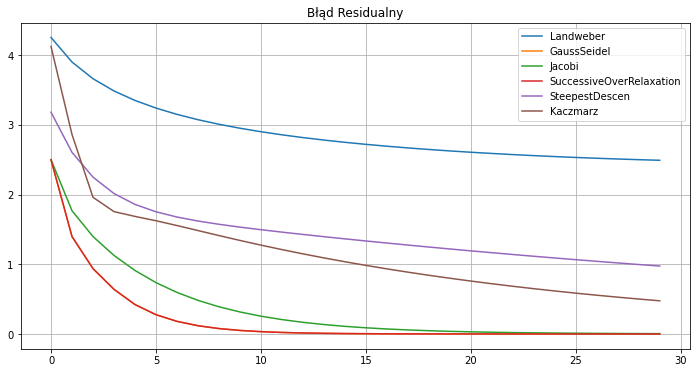

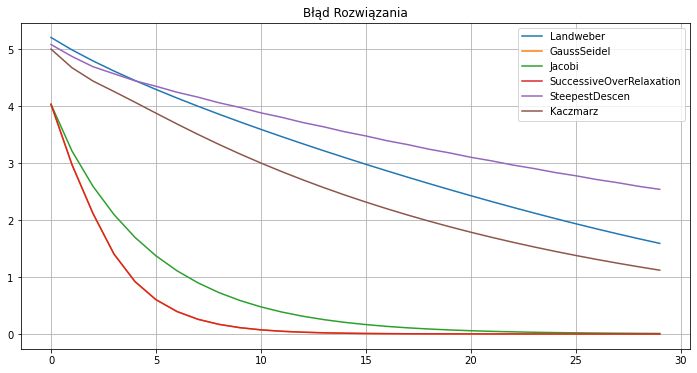

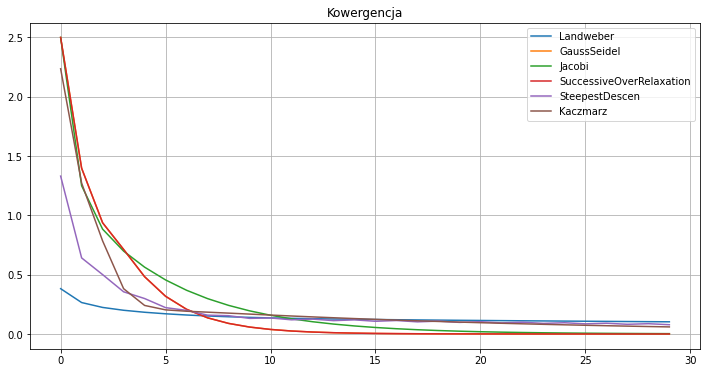

In [11]:
A = np.array([[2,-1,0,0],
              [-1,2,-1,0],
              [0,-1,2,-1],
              [0,0,-1,2]],dtype=np.double)
b = np.array([0,0,0,5],
             dtype=np.double).reshape(4,1)
x_solve = np.linalg.inv(A)@b

iterative_methods = testMethods(A,b,x_solve,30)

print("Rozwiązanie dokładne:")
print(x_solve)
print()

for m in iterative_methods:
    iter_ = iterative_methods[m]['Value'].shape[0]
    print(f"Wyniki uzyskane metodą {m}, w {iter_} iteracjach:")
    print(iterative_methods[m]['Value'][iter_-1])
    print(f'Czas wykonania {iter_} iteracji: {iterative_methods[m]["Time"]/1000} ms')
    print()
    
print("\n Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen")

drawPlots(iterative_methods)

---
## Zadanie 2

Rozwiązać następujący układ równań przy pomocy wybranych metod iteracyjnych:

Rozpocznij iteracje od x(0) = 0 . Przedstaw krzywe błędów residualnych i aproksymacji rozwiązania (dwa rysunki). Porównaj z rozwiązaniem uzyskanym z eliminacji Gaussa. Uzasadnij matematycznie (na podstawie promienia zbieżności) dlaczego nie udaje się uzyskać zbieżności niektórymi metodami iteracyjnymi.


Rozwiązanie dokładne:
[[ 1.]
 [-1.]
 [ 1.]]

Wyniki uzyskane metodą Landweber, w 30 iteracjach:
[[ 0.2062124 ]
 [ 0.97937765]
 [-0.72554397]]
Czas wykonania 30 iteracji: 853.625 ms

Wyniki uzyskane metodą GaussSeidel, w 30 iteracjach:
[[ 1.00000000e+00]
 [ 1.07374182e+09]
 [-1.07374182e+09]]
Czas wykonania 30 iteracji: 1402.158 ms

Wyniki uzyskane metodą Jacobi, w 30 iteracjach:
[[-1.67314747e+09]
 [-2.12455059e+09]
 [-2.80825193e+09]]
Czas wykonania 30 iteracji: 585.023 ms

Wyniki uzyskane metodą SuccessiveOverRelaxation, w 30 iteracjach:
[[ 1.00000000e+00]
 [ 1.07374182e+09]
 [-1.07374182e+09]]
Czas wykonania 30 iteracji: 671.074 ms

Wyniki uzyskane metodą SteepestDescen, w 30 iteracjach:
[[ 0.99996547]
 [-0.99999752]
 [ 1.00001288]]
Czas wykonania 30 iteracji: 685.694 ms

Wyniki uzyskane metodą Kaczmarz, w 30 iteracjach:
[[ 1.03827428]
 [-0.91201677]
 [ 0.89287963]]
Czas wykonania 30 iteracji: 2221.872 ms


 Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen

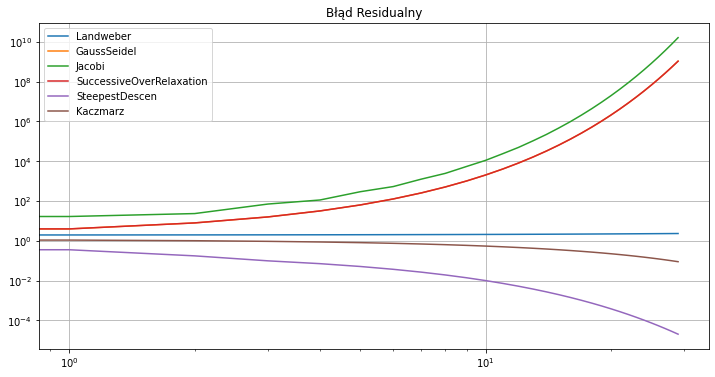

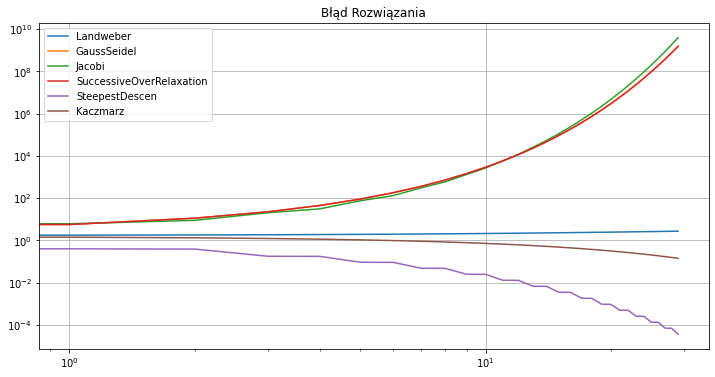

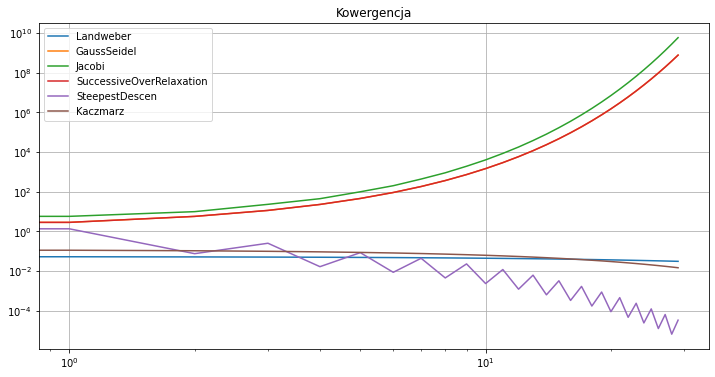

In [12]:
A = np.array([[1,1,1],
              [1,1,2],
              [1,2,2]],dtype=np.double)
b = np.array([1,2,1],
             dtype=np.double).reshape(3,1)
x_solve = np.linalg.inv(A)@b

iterative_methods = testMethods(A,b,x_solve,30)

print("Rozwiązanie dokładne:")
print(x_solve)
print()

for m in iterative_methods:
    iter_ = iterative_methods[m]['Value'].shape[0]
    print(f"Wyniki uzyskane metodą {m}, w {iter_} iteracjach:")
    print(iterative_methods[m]['Value'][iter_-1])
    print(f'Czas wykonania {iter_} iteracji: {iterative_methods[m]["Time"]/1000} ms')
    print()
    
print("\n Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen")

drawPlots(iterative_methods, log=True)

---
## Zadanie 3

Rozwiązanie dokładne:
[[-1.00000000e+00]
 [-1.00000000e+00]
 [ 1.11022302e-16]
 [ 1.00000000e+00]]

Wyniki uzyskane metodą Landweber, w 30 iteracjach:
[[ 0.39068366]
 [ 0.21582818]
 [ 0.10771593]
 [-0.18479123]]
Czas wykonania 30 iteracji: 724.104 ms

Wyniki uzyskane metodą GaussSeidel, w 30 iteracjach:
[[-1.37283303e+13]
 [-1.61061274e+09]
 [-4.11769379e+13]
 [ 4.11769379e+13]]
Czas wykonania 30 iteracji: 555.973 ms

Wyniki uzyskane metodą Jacobi, w 30 iteracjach:
[[ 5.98444840e+09]
 [ 1.02886412e+11]
 [-1.57290192e+11]
 [ 6.27764699e+10]]
Czas wykonania 30 iteracji: 765.104 ms

Wyniki uzyskane metodą SuccessiveOverRelaxation, w 30 iteracjach:
[[-1.37283303e+13]
 [-1.61061274e+09]
 [-4.11769379e+13]
 [ 4.11769379e+13]]
Czas wykonania 30 iteracji: 593.333 ms

Wyniki uzyskane metodą SteepestDescen, w 30 iteracjach:
[[-0.74366405]
 [-0.5935626 ]
 [ 0.09950257]
 [ 0.66537513]]
Czas wykonania 30 iteracji: 844.784 ms

Wyniki uzyskane metodą Kaczmarz, w 30 iteracjach:
[[-0.8582165 ]
 [-0.789

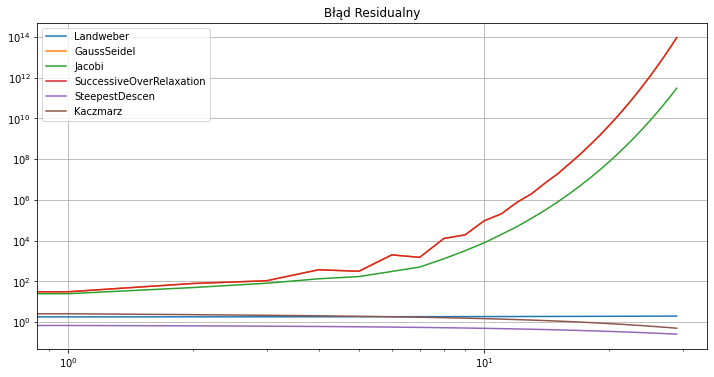

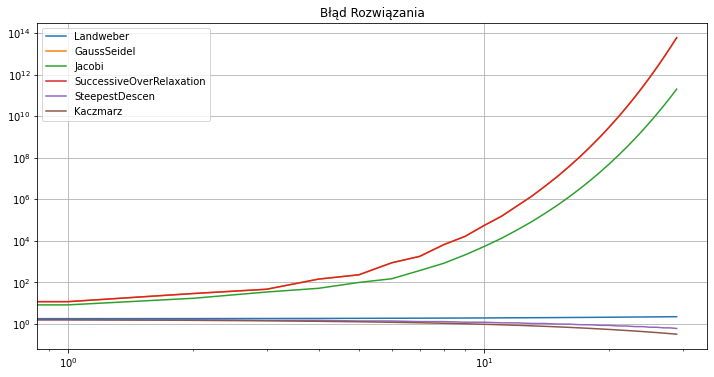

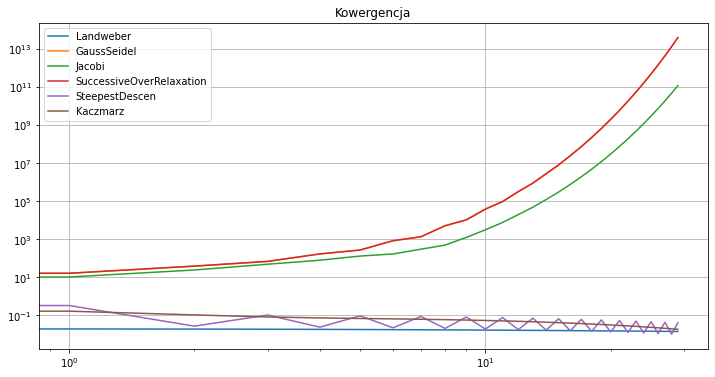

In [13]:
A = np.array([[1,2,3,4],
              [-1,1,2,1],
              [0,2,1,3],
              [0,0,1,1]],dtype=np.double)
b = np.array([1,1,1,1],
             dtype=np.double).reshape(4,1)
x_solve = np.linalg.inv(A)@b

iterative_methods = testMethods(A,b,x_solve,30)

print("Rozwiązanie dokładne:")
print(x_solve)
print()

for m in iterative_methods:
    iter_ = iterative_methods[m]['Value'].shape[0]
    print(f"Wyniki uzyskane metodą {m}, w {iter_} iteracjach:")
    print(iterative_methods[m]['Value'][iter_-1])
    print(f'Czas wykonania {iter_} iteracji: {iterative_methods[m]["Time"]/1000} ms')
    print()
    
print("\n Parametry: alpha=1 dla metody Kaczmarza, omega=1 dla metody Steepest-Descen")

drawPlots(iterative_methods, log=True)

--- 
## Zadanie 4

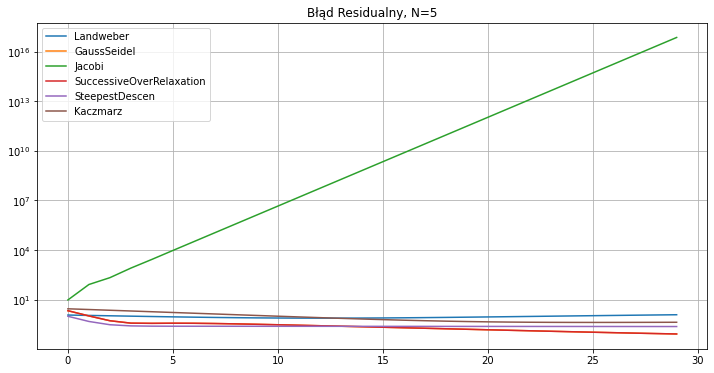

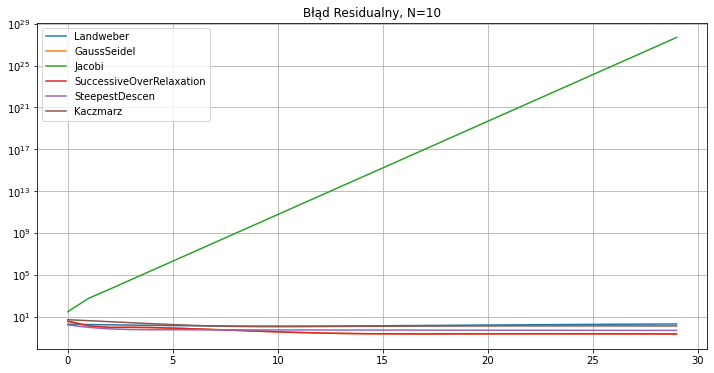

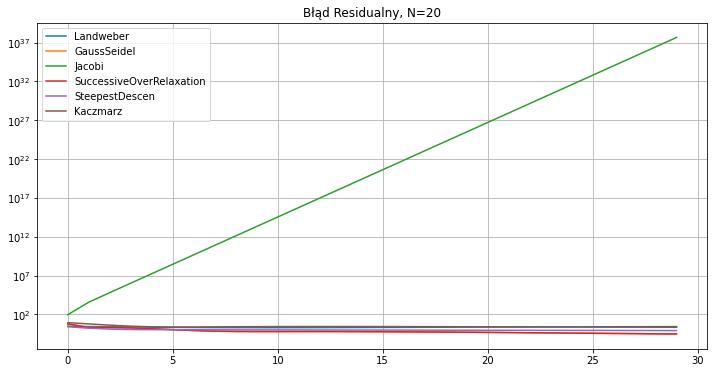

In [14]:
N = [5,10,20]
A = [sp.hilbert(n) for n in N]
b = [np.ones(n).reshape(n,1) for n in N]
x_solve = [np.linalg.inv(A[i])@b[i] for i in range(len(N))]

methods = [testMethods(A[i],b[i],x_solve[i],30) for i in range(len(N))]

for i in range(len(N)):
    for m in methods[i]:
        plt.semilogy(range(methods[i][m]['Value'].shape[0]),methods[i][m]['Error']['Residual'], label=m)
    plt.title(f'Błąd Residualny, N={N[i]}')
    plt.grid()
    plt.legend()
    plt.show()

---
## Zadanie 5


Wynikia dla N=10:
Czas wykonania metodą Landweber: 597.623 ms
Czas wykonania metodą GaussSeidel: 401.913 ms
Czas wykonania metodą Jacobi: 302.062 ms
Czas wykonania metodą SuccessiveOverRelaxation: 411.972 ms
Czas wykonania metodą SteepestDescen: 638.723 ms
Czas wykonania metodą Kaczmarz: 6334.074 ms


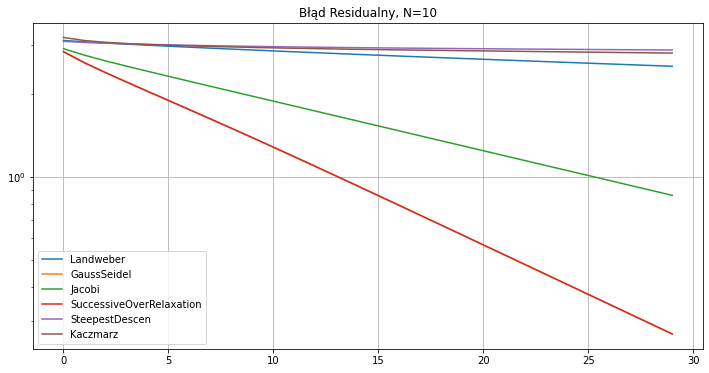

Wynikia dla N=100:
Czas wykonania metodą Landweber: 7698.722 ms
Czas wykonania metodą GaussSeidel: 2445.944 ms
Czas wykonania metodą Jacobi: 1171.217 ms
Czas wykonania metodą SuccessiveOverRelaxation: 2341.412 ms
Czas wykonania metodą SteepestDescen: 1836.2 ms
Czas wykonania metodą Kaczmarz: 62355.584 ms


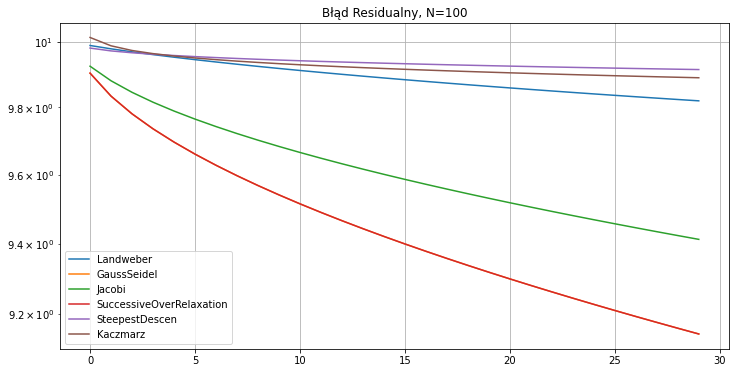

Wynikia dla N=1000:
Czas wykonania metodą Landweber: 1590098.641 ms
Czas wykonania metodą GaussSeidel: 534345.94 ms
Czas wykonania metodą Jacobi: 66543.667 ms
Czas wykonania metodą SuccessiveOverRelaxation: 576731.508 ms
Czas wykonania metodą SteepestDescen: 70857.311 ms
Czas wykonania metodą Kaczmarz: 512157.621 ms


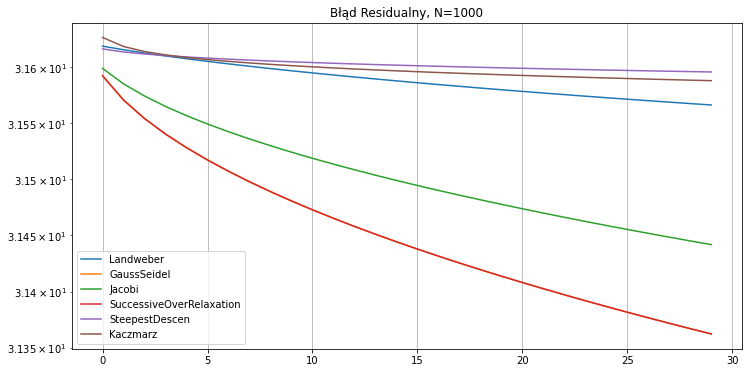

In [18]:
N = [10**i for i in range(1,4)]
A = [np.zeros((n,n)) for n in N]
for i in range(len(N)):
    np.fill_diagonal(A[i], 2)
    np.fill_diagonal(A[i][1:], -np.ones(N[i]-2))
    np.fill_diagonal(A[i][:,1:], -np.ones(N[i]-2))
b = [np.ones(n).reshape(n,1) for n in N]

x_solve = [np.linalg.inv(A[i])@b[i] for i in range(len(N))]

methods = [testMethods(A[i],b[i],x_solve[i],30) for i in range(len(N))]

for i in range(len(N)):
    print(f'Wynikia dla N={N[i]}:')
    iter_ = iterative_methods[m]['Value'].shape[0]
    for m in methods[i]:
        print(f'Czas wykonania metodą {m}: {methods[i][m]["Time"]/1000} ms')
        plt.semilogy(range(methods[i][m]['Value'].shape[0]),methods[i][m]['Error']['Residual'], label=m)
    plt.title(f'Błąd Residualny, N={N[i]}')
    plt.grid()
    plt.legend()
    plt.show()